# Visualization using pyGMT

Jalankan file ini di jupyter conda environment pygmt, dengan cara:

1. Buka Anaconda Prompt
2. Aktifkan pygmt environment: `conda activate pygmt`
3. Arahkan ke direktori file ini disimpan, contoh: `cd C:\Users\USERNAME\Documents`
4. buka jupyter: `jupyter notebook`

## 1. Import packages

In [4]:
import pickle
import pygmt
import numpy as np

## 2. Reading from 3.2

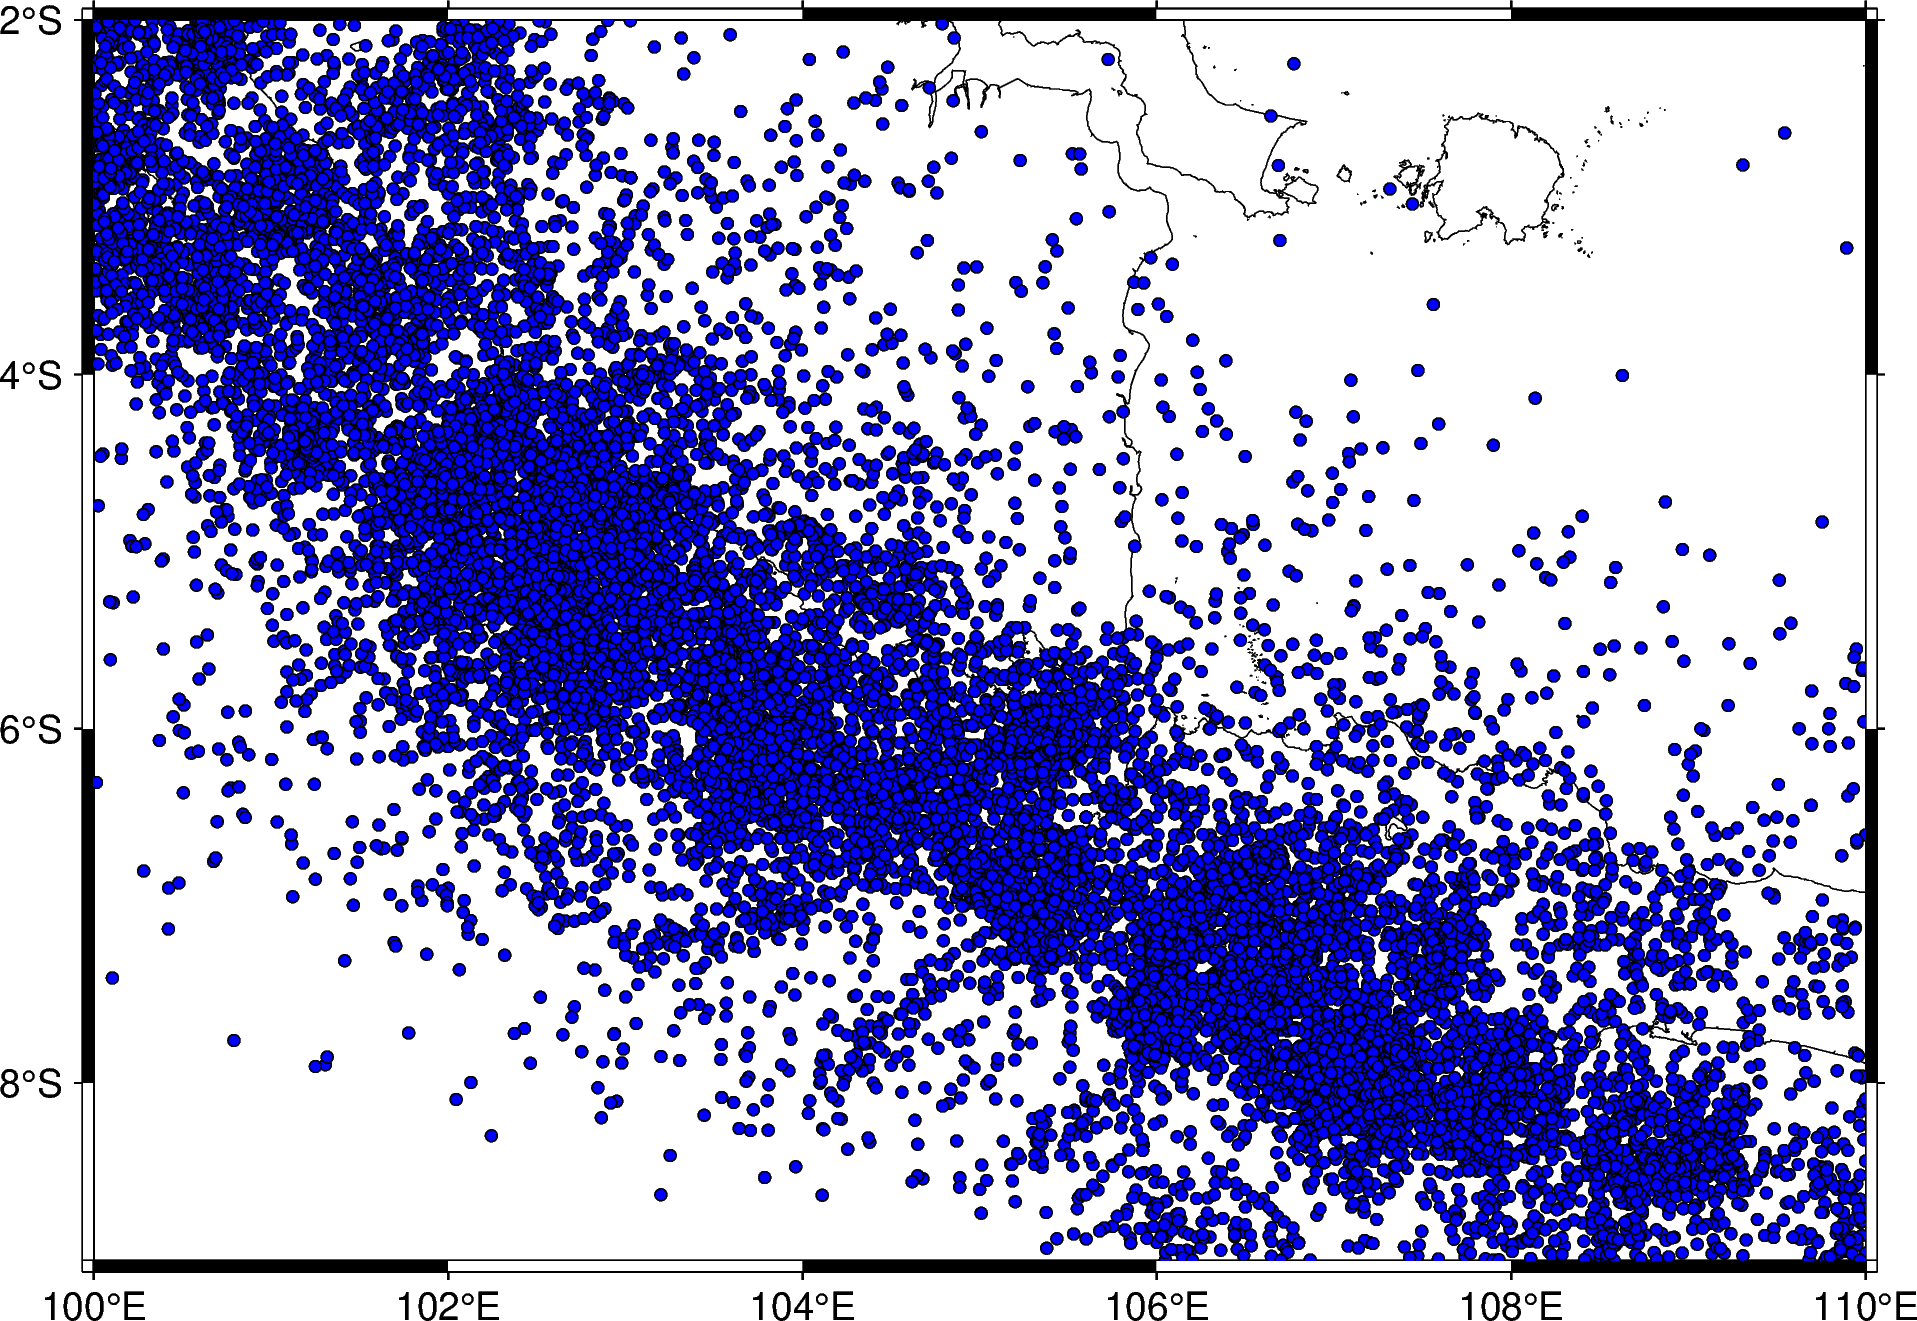

In [ ]:
with open('dict_catalogue.pkl', 'rb') as file:
    dict_catalogue = pickle.load(file)

data = dict_catalogue

fig = pygmt.Figure()
fig.coast(region=[100, 110, -9, -2], 
          frame="a",
          shorelines=True)
fig.plot(x=data['lon'], y=data['lat'], style="c0.1c", fill="blue", pen="black")
fig.show()

## 2. Reading from 4.1

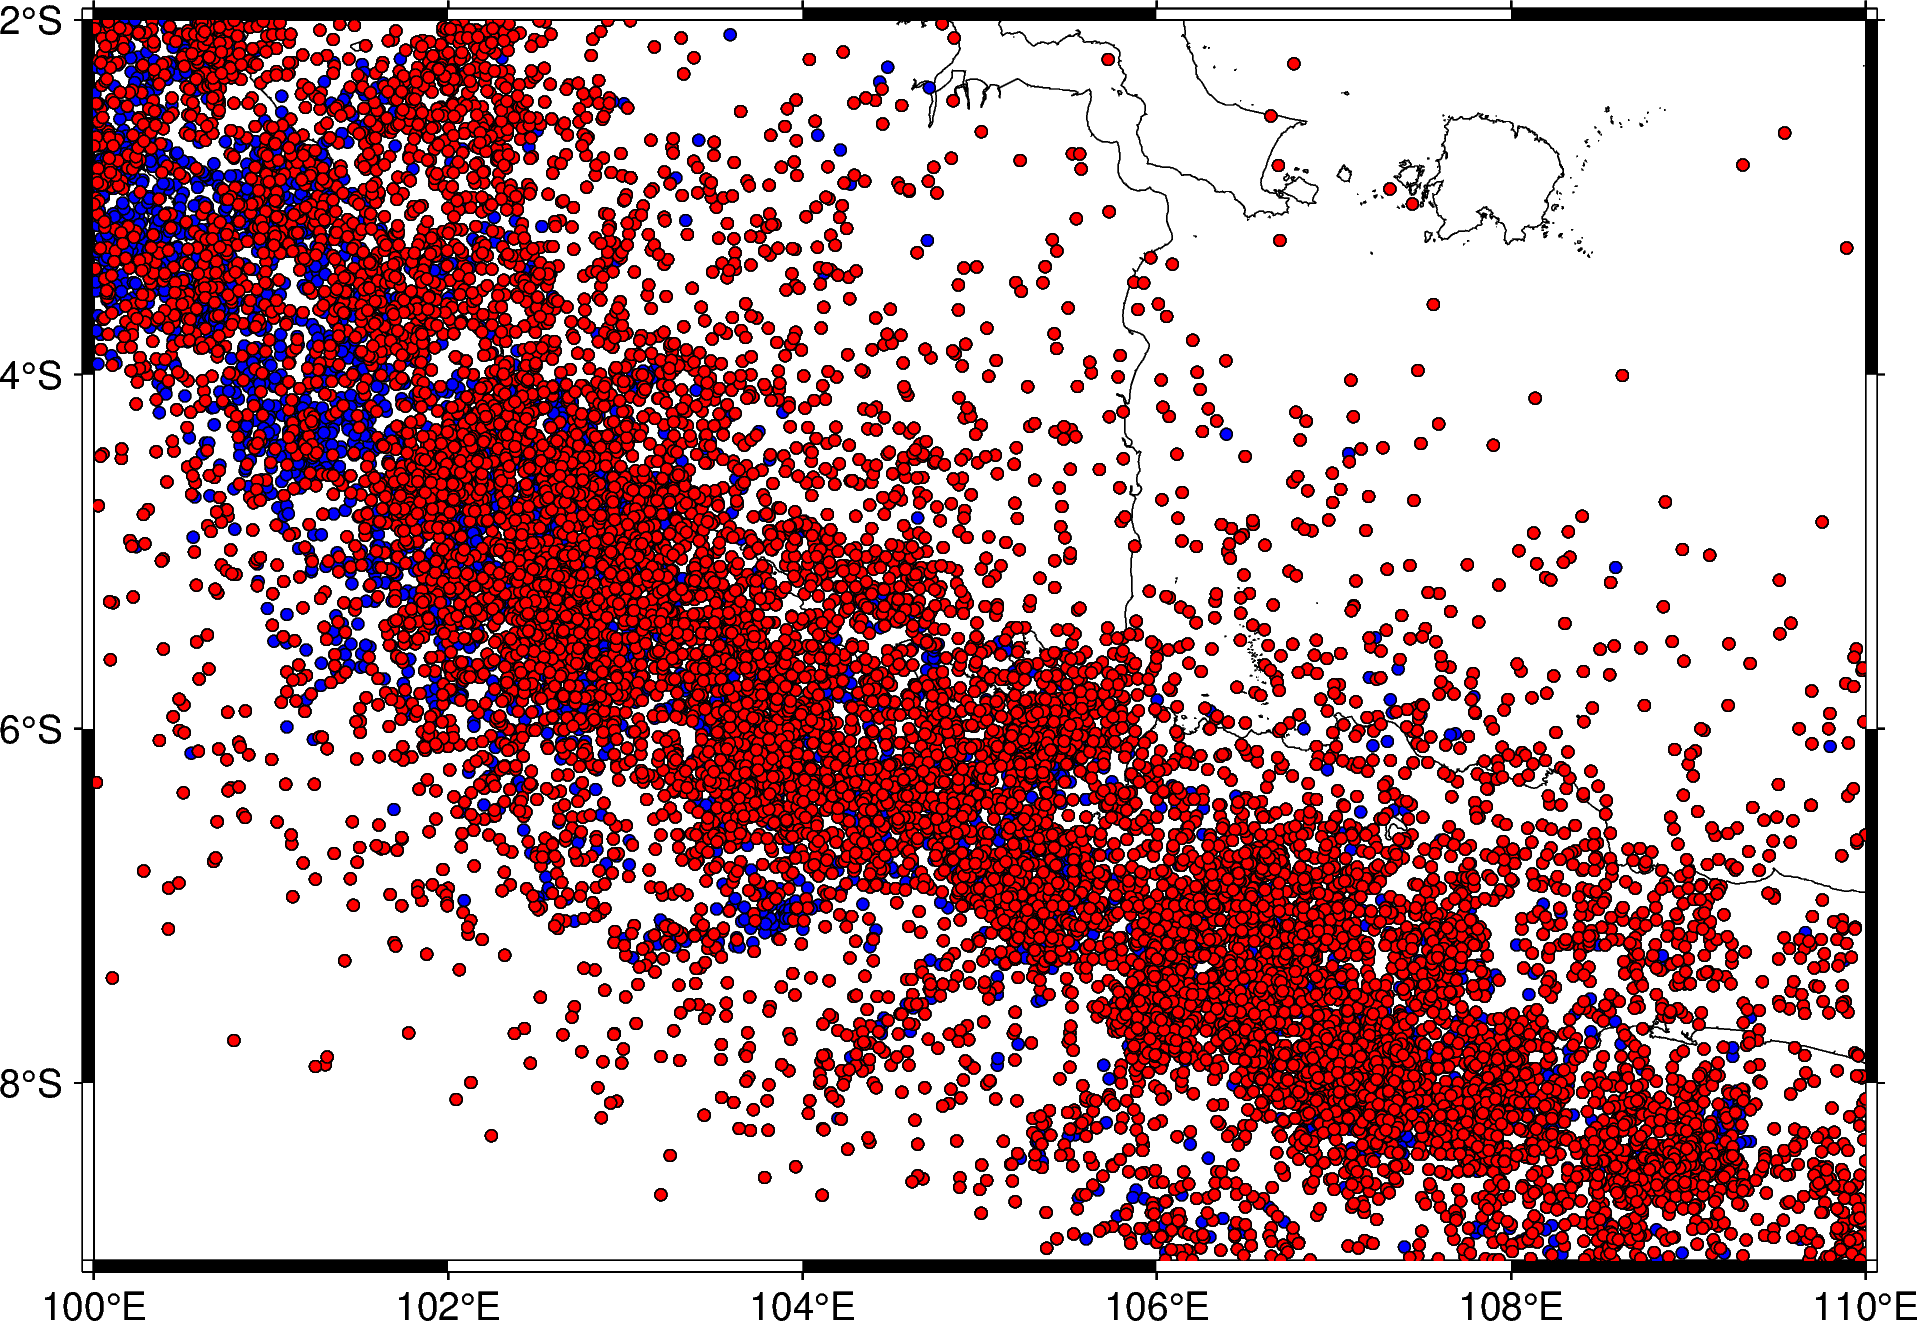

In [3]:
with open('dict_catalogue.pkl', 'rb') as file:
    dict_catalogue = pickle.load(file)

with open('dict_catalogue_declustered.pkl', 'rb') as file:
    dict_catalogue_declustered = pickle.load(file)

data = dict_catalogue
data_c = dict_catalogue_declustered

fig = pygmt.Figure()
fig.coast(region=[100, 110, -9, -2], 
          frame="a",
          shorelines=True)
fig.plot(x=data['lon'], y=data['lat'], style="c0.1c", fill="blue", pen="black")
fig.plot(x=data_c['lon'], y=data_c['lat'], style="c0.1c", fill="red", pen="black")
fig.show()

## 2. Reading from 5.1.2.1

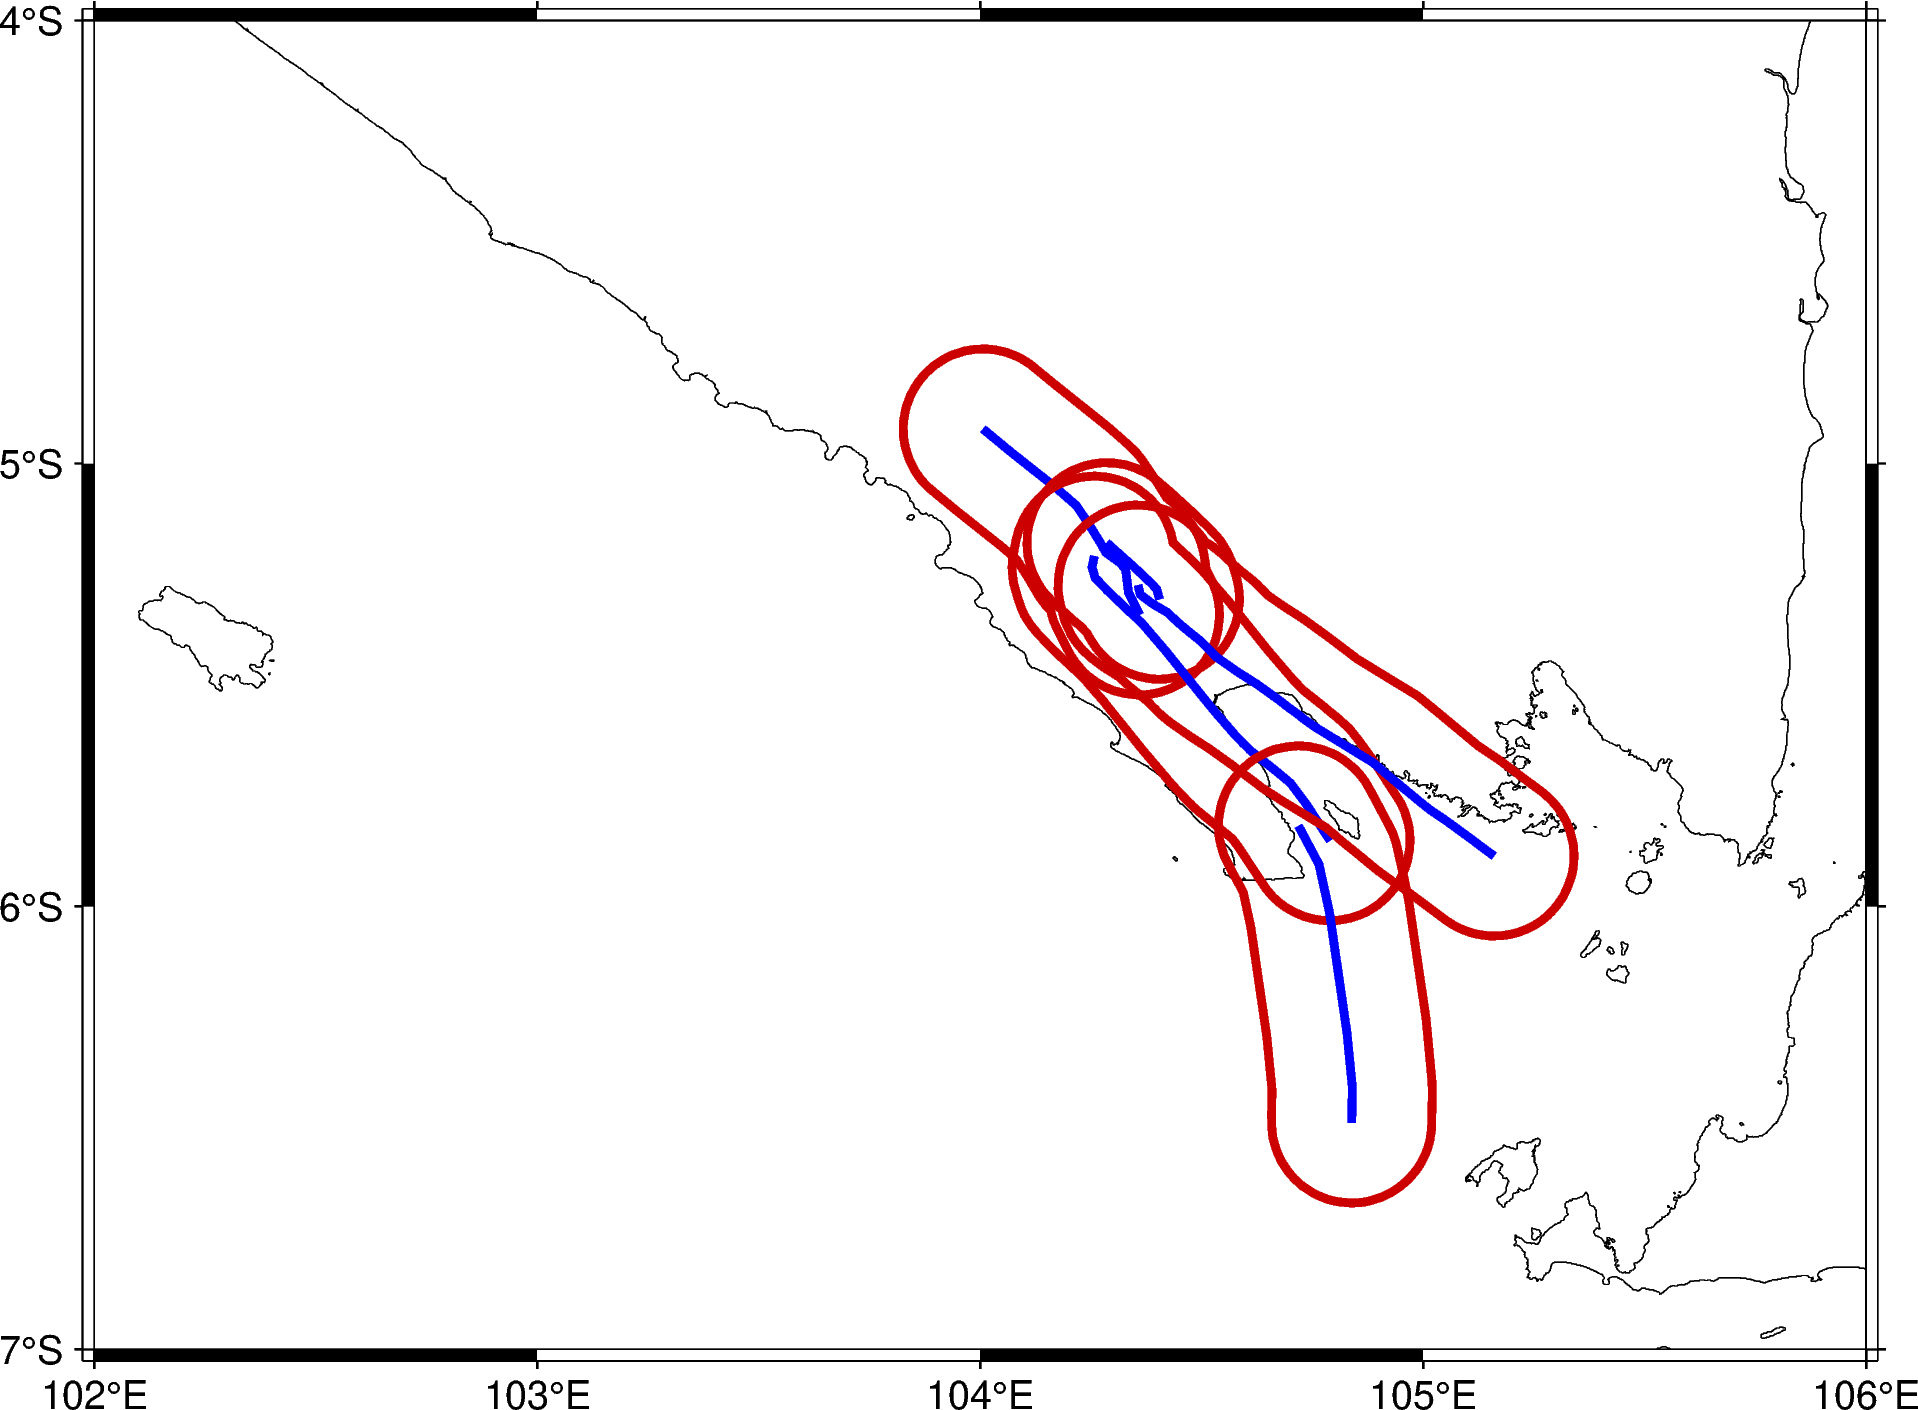

In [5]:
with open('dict_faults.pkl', 'rb') as file:
    dict_faults = pickle.load(file)

fig = pygmt.Figure()
fig.coast(region=[102, 106, -7, -4], 
          frame="a",
          shorelines=True)
for fault, poly in zip(dict_faults["faults"], dict_faults["polygon_faults"]):
    fig.plot(x=fault[:,0], y=fault[:,1], pen="2p,blue")
    fig.plot(x=poly[0], y=poly[1], pen="2p,red3")
fig.show()

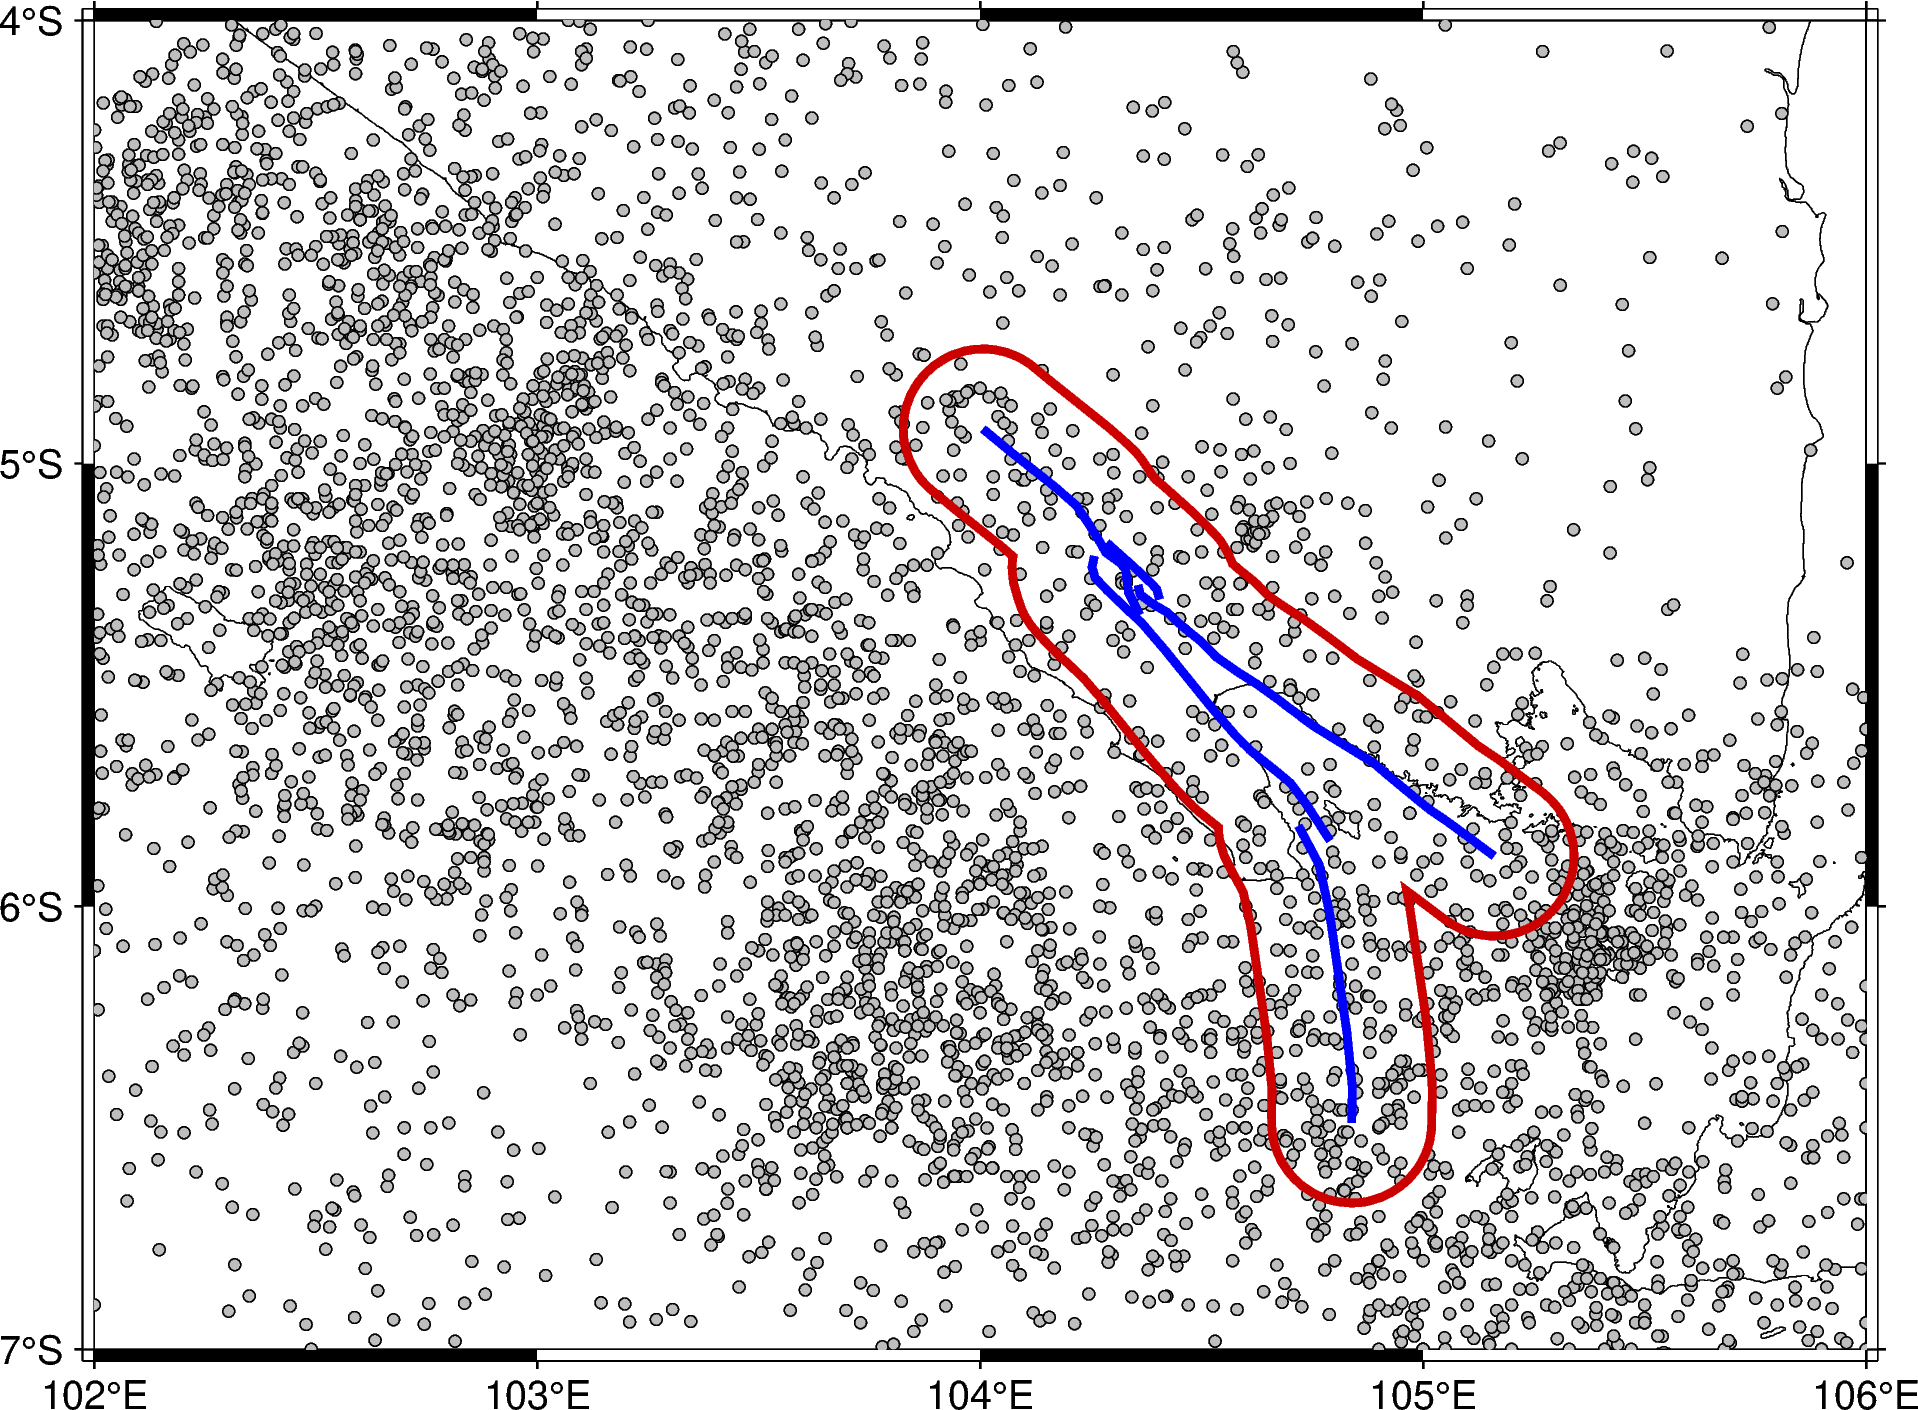

In [ ]:
with open('dict_catalogue_declustered.pkl', 'rb') as file:
    dict_catalogue_declustered = pickle.load(file)

with open('dict_faults.pkl', 'rb') as file:
    dict_faults = pickle.load(file)

fig = pygmt.Figure()
fig.coast(region=[102, 106, -7, -4], 
          frame="a",
          shorelines=True)
fig.plot(x=dict_catalogue_declustered['lon'], y=dict_catalogue_declustered['lat'], style="c0.1c", fill="grey", pen="black")
for fault in dict_faults["faults"]:
    fig.plot(x=fault[:,0], y=fault[:,1], pen="2p,blue")
fig.plot(x=dict_faults["merge_lon"], y=dict_faults["merge_lat"], pen="2p,red3")
fig.show()

## 3. Reading from 5.1.3.1

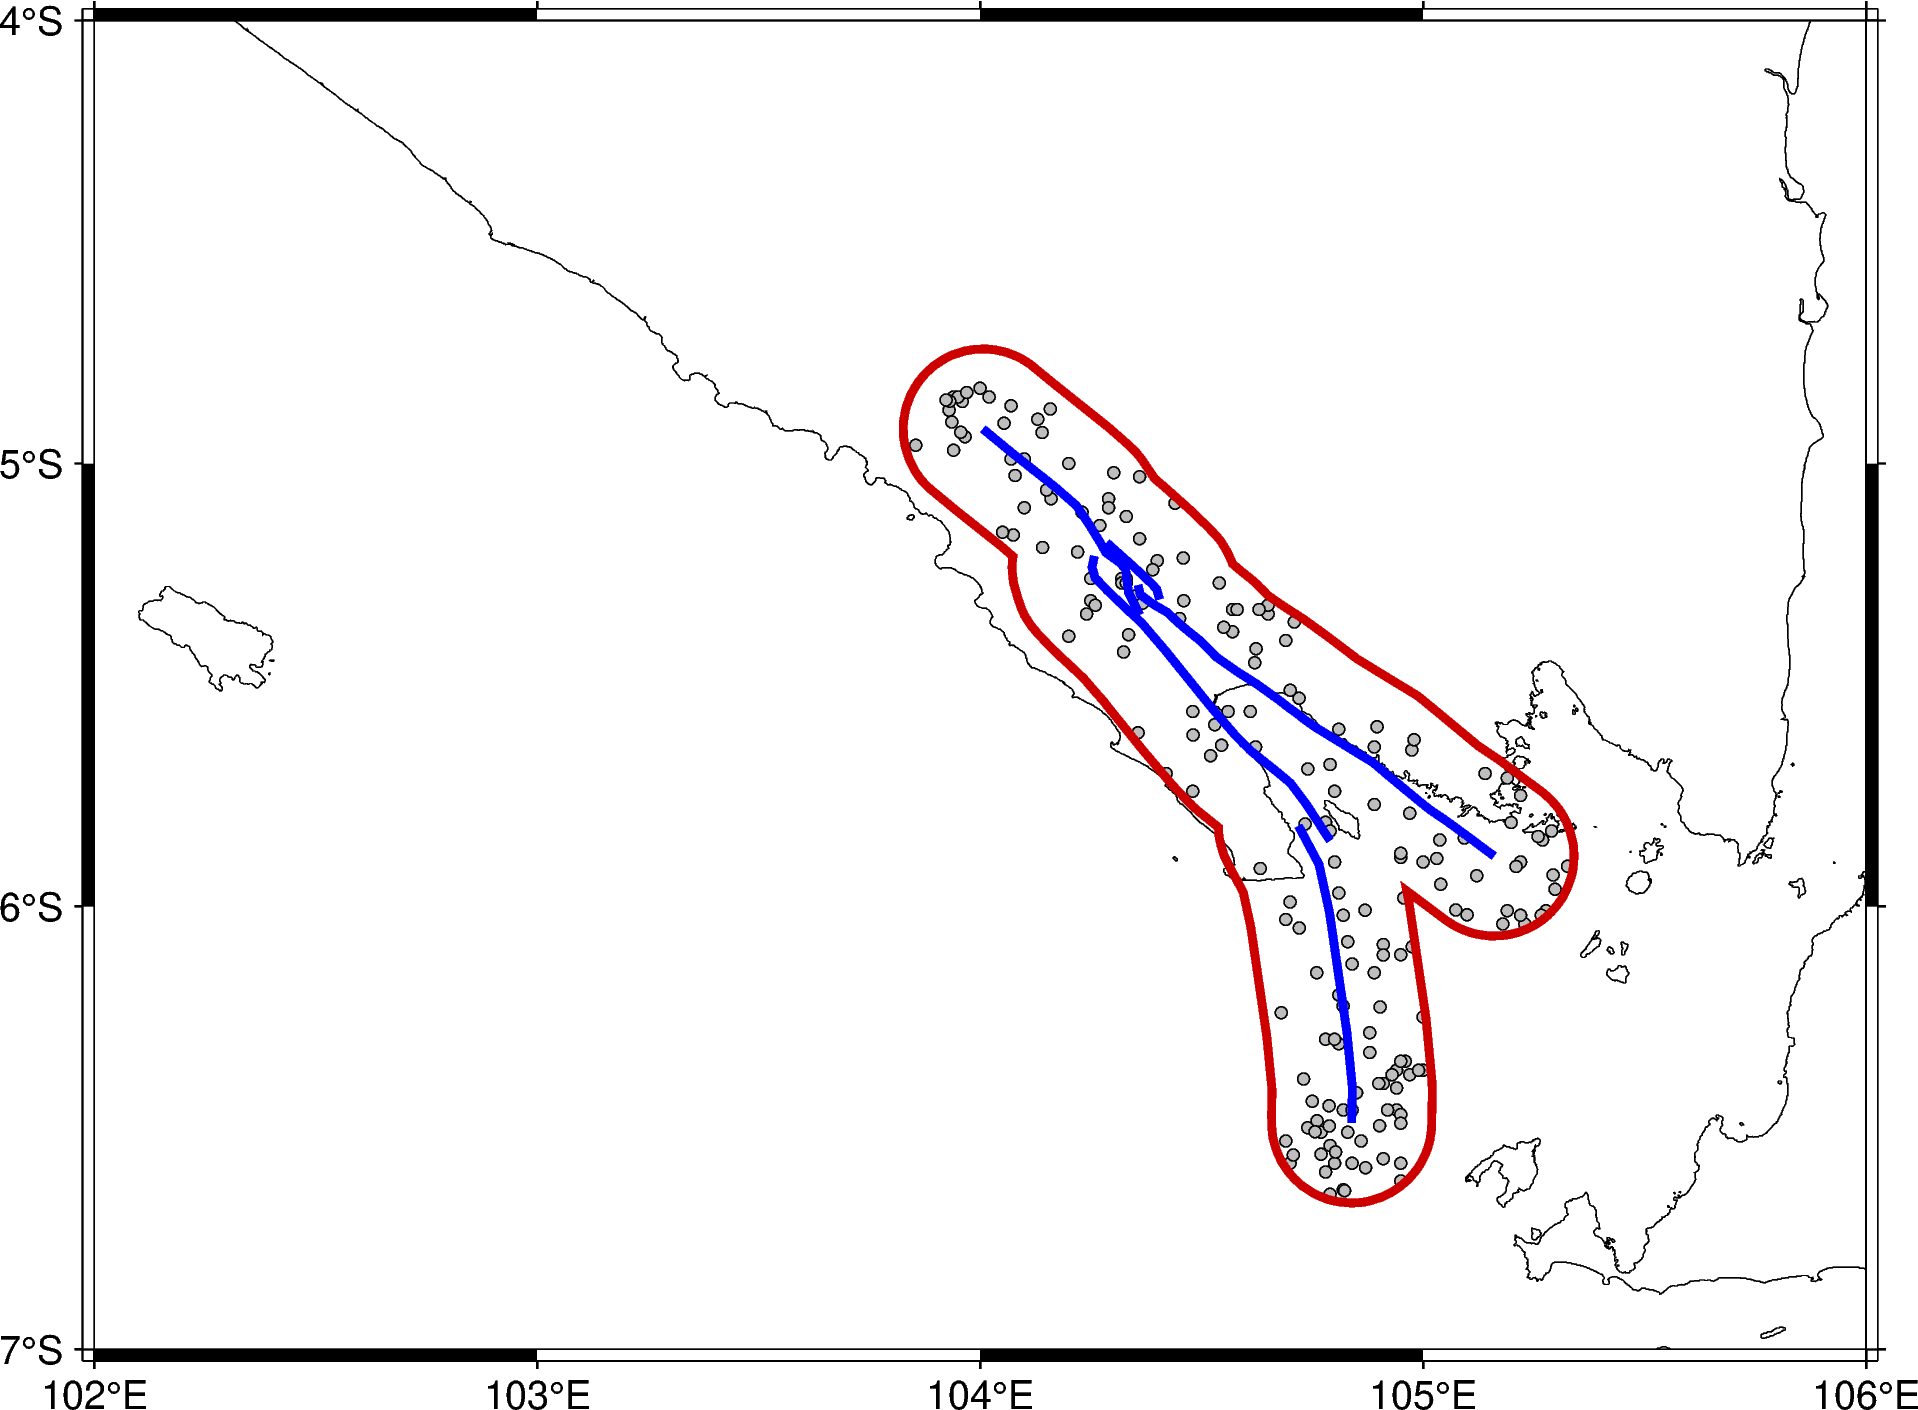

In [7]:
with open('dict_catalogue_FaultArea_Depth20km.pkl', 'rb') as file:
    dict_catalogue_FaultArea_Depth20km = pickle.load(file)

with open('dict_faults.pkl', 'rb') as file:
    dict_faults = pickle.load(file)

fig = pygmt.Figure()
fig.coast(region=[102, 106, -7, -4], 
          frame="a",
          shorelines=True)
fig.plot(x=dict_catalogue_FaultArea_Depth20km['lon'], y=dict_catalogue_FaultArea_Depth20km['lat'], style="c0.1c", fill="grey", pen="black")
for fault in dict_faults["faults"]:
    fig.plot(x=fault[:,0], y=fault[:,1], pen="2p,blue")
fig.plot(x=dict_faults["merge_lon"], y=dict_faults["merge_lat"], pen="2p,red3")
fig.show()

## 3. Reading from 5.2.2.1

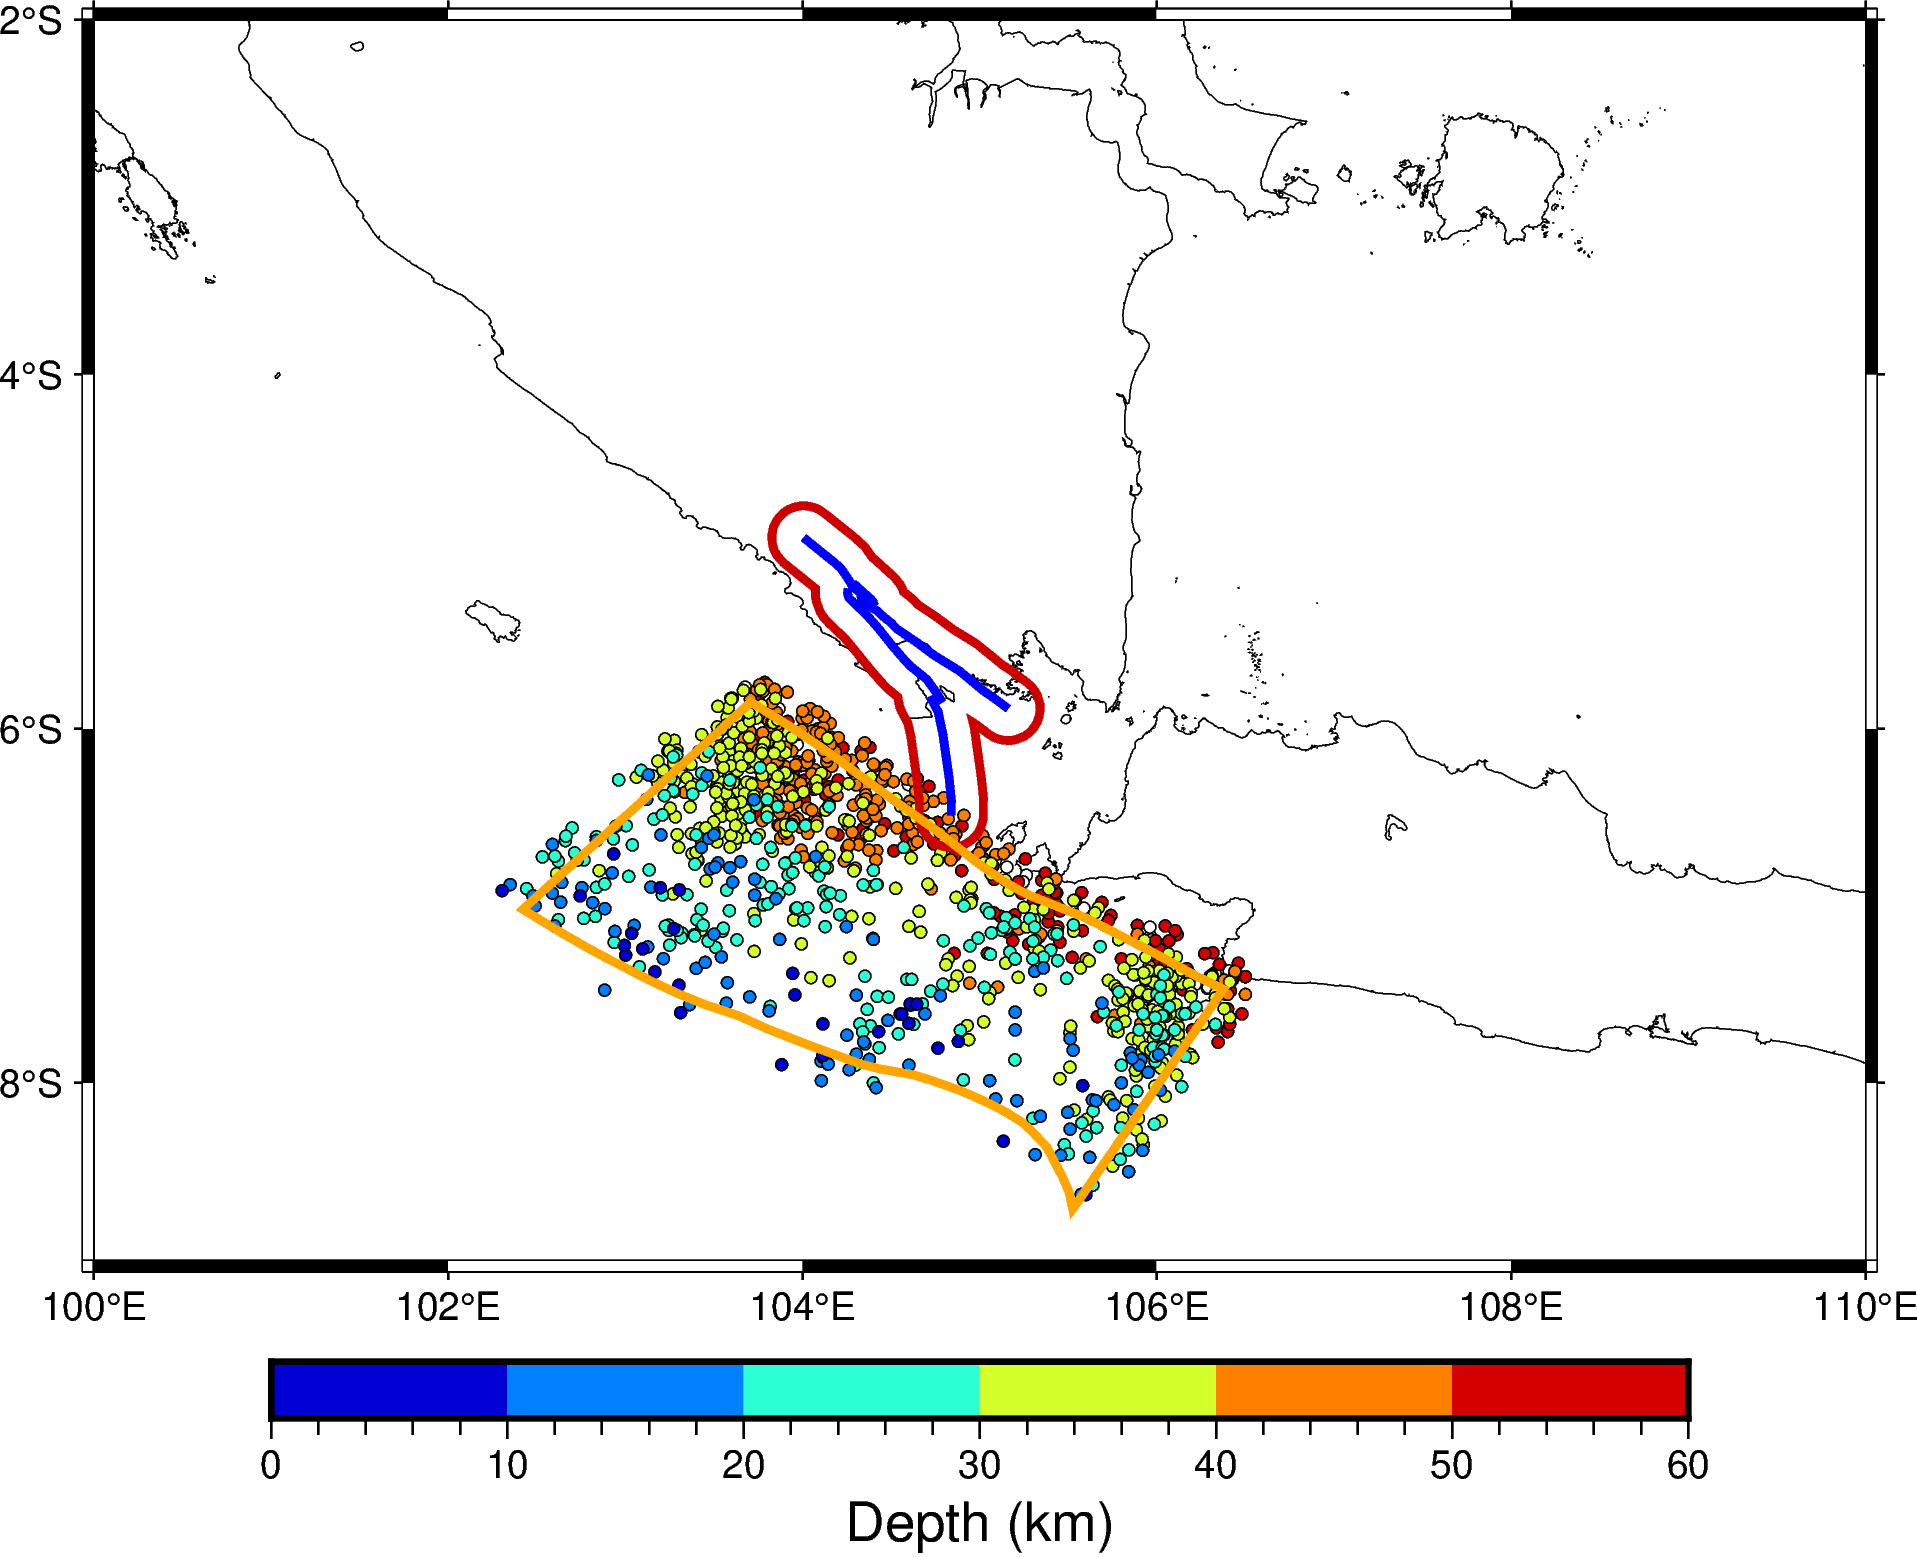

In [11]:
with open('dict_catalogue_megathrust.pkl', 'rb') as file:
    dict_catalogue_megathrust = pickle.load(file)

with open('dict_megathrust.pkl', 'rb') as file:
    dict_megathrust = pickle.load(file)

with open('dict_faults.pkl', 'rb') as file:
    dict_faults = pickle.load(file)

fig = pygmt.Figure()
fig.coast(region=[100, 110, -9, -2], 
          frame="a",
          shorelines=True)

pygmt.makecpt(
    cmap="jet",
    series=[min(dict_catalogue_megathrust['dep']), max(dict_catalogue_megathrust['dep']), 10]
)

fig.plot(x=dict_catalogue_megathrust['lon'], 
          y=dict_catalogue_megathrust['lat'], 
          style="c0.1c", 
          fill=dict_catalogue_megathrust['dep'], 
          cmap=True, pen="black")

for fault in dict_faults["faults"]:
    fig.plot(x=fault[:,0], y=fault[:,1], pen="2p,blue")

fig.plot(x=dict_faults["merge_lon"], y=dict_faults["merge_lat"], pen="2p,red3")
fig.plot(x=dict_megathrust["lon"], y=dict_megathrust["lat"], pen="2p,orange")

fig.colorbar(frame="af+lDepth (km)")
fig.show()

## 3. Reading from 5.3.3

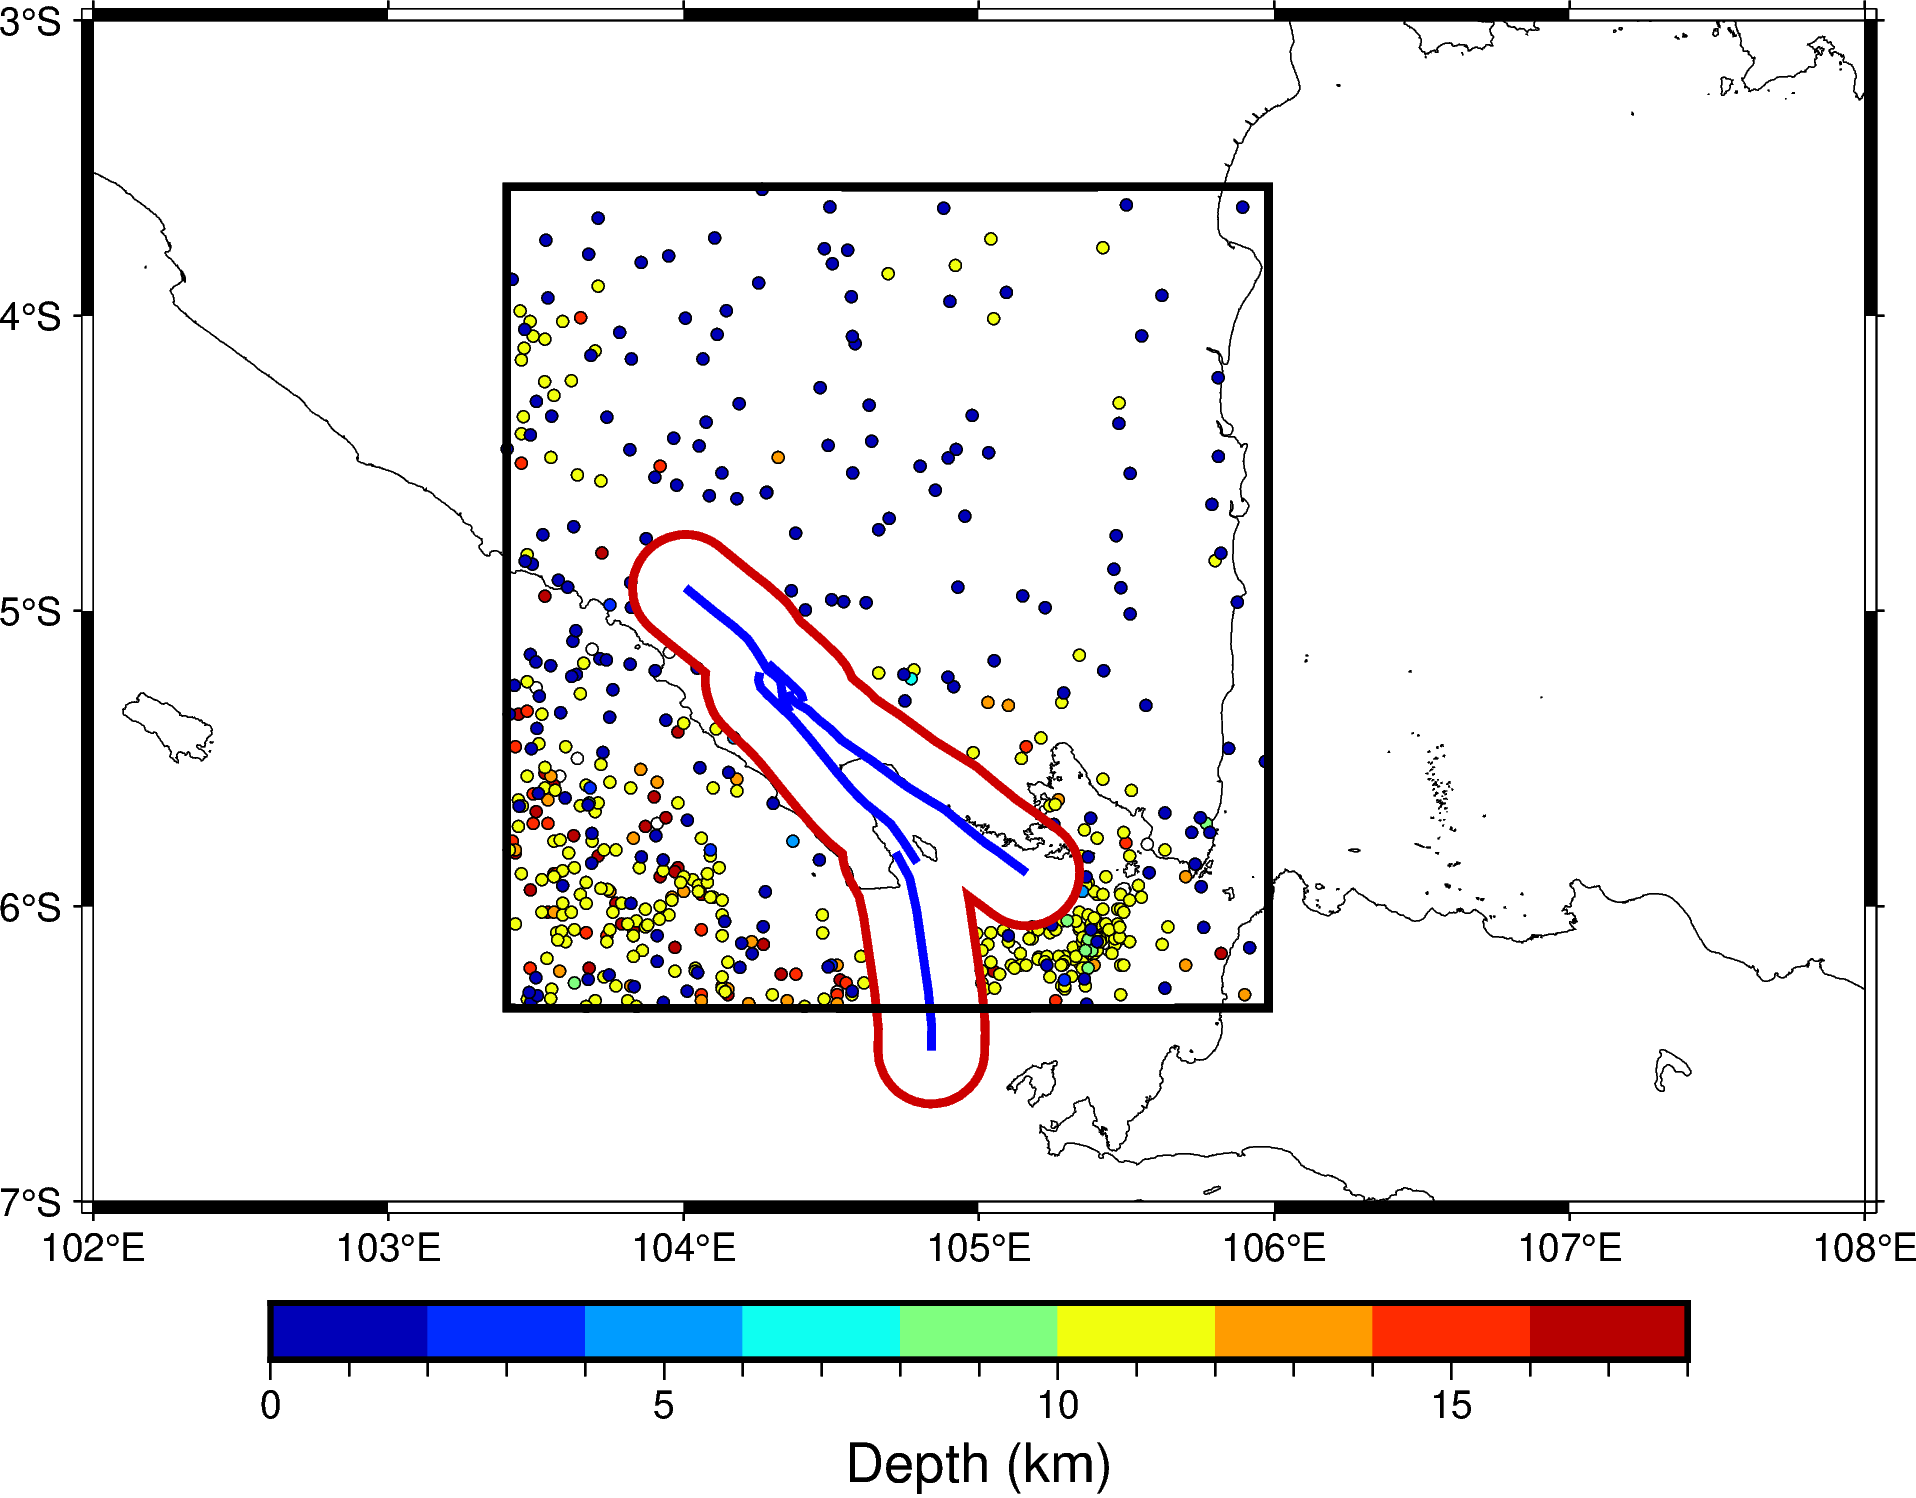

In [13]:
with open('dict_catalogue_shallowbackground.pkl', 'rb') as file:
    dict_catalogue_shallowbackground = pickle.load(file)

with open('dict_shallowbackground.pkl', 'rb') as file:
    dict_shallowbackground = pickle.load(file)

with open('dict_faults.pkl', 'rb') as file:
    dict_faults = pickle.load(file)

fig = pygmt.Figure()
fig.coast(region=[102, 108, -7, -3], 
          frame="a",
          shorelines=True)

pygmt.makecpt(
    cmap="jet",
    series=[min(dict_catalogue_shallowbackground['dep']), max(dict_catalogue_shallowbackground['dep']), 2]
)

fig.plot(x=dict_catalogue_shallowbackground['lon'], 
          y=dict_catalogue_shallowbackground['lat'], 
          style="c0.1c", 
          fill=dict_catalogue_shallowbackground['dep'], 
          cmap=True, pen="black")

for fault in dict_faults["faults"]:
    fig.plot(x=fault[:,0], y=fault[:,1], pen="2p,blue")

fig.plot(x=dict_faults["merge_lon"], y=dict_faults["merge_lat"], pen="2p,red3")
fig.plot(x=dict_shallowbackground["lon"], y=dict_shallowbackground["lat"], pen="2p,black")

fig.colorbar(frame="af+lDepth (km)")
fig.show()